# Math for ML: Univariate Calculus

In this part of Math for ML, I'll cover the basics of calculus, particularly in the simple univariate case. In the next lesson I'll cover the somewhat more sophisticated multivariate calculus.

Calculus is essentially the study of the continuum. Important things that calculus seeks to understand are:
- Infinitesimals: How to manipulate numbers that are "infinitely" small.
- Limits: What happens when numbers get arbitrarily close to each other.
- Differentiation: How one variable changes continuously in response to one or more other variables. 
- Integration: How to add up infinitely many small numbers to get a finite number.

Not all of these topics are equally important to know for machine learning, but I'll try to at least touch on each topic a little bit. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

plt.rcParams["figure.figsize"] = (4, 3)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Infinitesimals

Fundamental to the understanding of calculus is the idea of an "infinitely small" number, called an infinitesimal. An **infinitesimal** is a number that's not 0 but so close to being 0 that you can't really tell it isn't 0. These small numbers are often written in math with letters like $\varepsilon$ or $\delta$. Think of them as *very very* tiny numbers, so tiny their square is basically 0:
$$\varepsilon > 0, \quad \varepsilon^2 \approx 0.$$

But what does this even mean? Here it might be helpful to recall our discussion of floating point numbers. Recall that we can't get infinite precision. In python's double precision floating point we can only get down to about $5 \cdot 10^{-324}$, or `5e-324`. If the square of a small number has a value *smaller* than about `5e-324` we'd literally get `0.0` as far as python is concerned.

Just for fun let's look at the really tiny number $10^{-300}$, or `1e-300`. That's 300 decimal places of zeros before the 1 even shows up. Python thinks `1e-300` is just fine. But what happens if we square it? We should in theory get $10^{-600}$, or 600 decimal places of zeros followed by a 1. But as far as floating point is concerned, the square is zero.

In [3]:
epsilon = np.float64(1e-300)
epsilon, epsilon ** 2

(1e-300, 0.0)

Of course, you could argue that we could just go to a higher precision then. Use more bits. But eventually, if we keep making $\varepsilon$ small enough we'll hit a point where $\varepsilon^2 = 0$. Thus, if it makes you feel better, when you see an infinitesimal just think "$10^{-300}$ in double precision".

**Aside:** If you want to be *really* pedantic, you might say that it shouldn't matter what a computer does, since any positive number $\varepsilon$ squared must still be greater than zero, no matter how small $\varepsilon$ is. This is true for *real numbers* $\mathbb{R}$. But it turns out infinitesimals aren't real numbers at all. They lie in an extension of the real number line called the **hyperreal numbers**, denoted $\mathbb{R}^*$. In my opinion, this isn't an important distinction to worry about in applied calculus.

Similar to infinitesimals being numbers that can be really, really small, we can also talk about numbers being really, really big. These are called **infinitely large** numbers. In analogy to infinitesimals, infinitely large numbers are positive numbers $N$ whose square is basically infinite,

$$N > 0, \quad N^2 \approx \infty.$$

We can get infinitely large numbers by inverting infinitesimals, and vice versa,

$$N = \frac{1}{\varepsilon}, \quad \varepsilon = \frac{1}{N}.$$

If $10^{-300}$ is a good rule of thumb for an infinitesimal, then $10^{300}$ is a good rule of thumb for an infinitely large number.

In [4]:
N = np.float64(1e300)
N, N ** 2

(1e+300, inf)

Infinitesimals are especially interesting when added to regular numbers. These are called **first order perturbations**. For example, consider some finite number $x$. It could be $2$ or $-100$ or whatever you want. Suppose now we add to it an infinitesimal number $\varepsilon$. Now suppose we have an output $y$ that depends on $x$ through a function $y=f(x)=x^2$. What happens to $y$ if we perturb $x$ to $x+\varepsilon$? That is, what is $f(x + \varepsilon)=(x+\varepsilon)^2$? Expanding the square, we have

$$f(x + \varepsilon) = (x + \varepsilon)^2 = x^2 + 2x\varepsilon + \varepsilon^2.$$

But since $\varepsilon^2 \approx 0$,

$$f(x + \varepsilon) = (x + \varepsilon)^2 \approx x^2 + 2x\varepsilon.$$

Okay, but what does this mean? Well, I can reformulate the question as follows: "If I change $x$ by a little bit, how much does the function $y$ change"? Call this change $\delta$, the change in $y$ due to $x$ getting changed by $\varepsilon$. Since $\delta = f(x+\varepsilon) - f(x)$ by definition, we'd have

$$\delta = f(x+\varepsilon) - f(x) = (x+\varepsilon)^2 - x^2 \approx 2x\varepsilon.$$

That is, if we change $x$ by a small amount $\varepsilon$, then $y$ itself changes by a small amount $\delta=2x\varepsilon$. Interestingly, how much $y$ changes actually depends on which $x$ we pick. If $x=1$ then $y$ changes by $2\varepsilon$, just twice how much $x$ is nudged. If $x=1000$ though, then $y$ changes by $2000\varepsilon$, a much bigger change, but still infinitesimal. After all, $2000 \cdot 10^{-300} = 2 \cdot 10^{-297}$ is still really, really small.

### Limits

One application of infinitesimals is to look at the nearby behavior of a function around some point. Suppose we have some function $y=f(x)$. We'd like to look at the nearby behavior of the function around some point $x=x_0$. By that, I don't mean, what is $f(x_0)$, I mean what is $f(x)$ when $x$ is infinitesimally close to $x_0$.

Consider a first order perturbation $x = x_0+\varepsilon$ sending $f(x_0)$ to $f(x_0+\varepsilon)$. Imagine making $\varepsilon$ smaller and smaller until it's infinitesimal. If $y=f(x_0+\varepsilon)$ gets closer and closer to some value $L$, we call $L$ the **limit** as $x$ approaches $x_0$, and write

$$L = \lim_{x \rightarrow x_0} f(x).$$

More formally, say $L$ is the limit if the difference $|f(x_0+\varepsilon)-L|$ is infinitesimal whenever $\varepsilon$ is too. Another notation for the limit is

$$y \rightarrow L \text{ as } x \rightarrow x_0.$$

This all seems kind of pedantic if you think about it. It seems like we're doing a bunch of extra work just to evaluate the function at $x_0$ to finally get $L=f(x_0)$? In most cases in practice this is true, but not *always*. 

A classic example is a function with a hole in it. Suppose we have a function $y=f(x)$ like this

$$
y = 
\begin{cases}
1 & x = 0, \\
x^2 & x \neq 0.
\end{cases}
$$

Here's what it looks like. It's just a parabola $y=x^2$, but with a hole at $x=0$ since $f(0)=1\neq 0^2$.

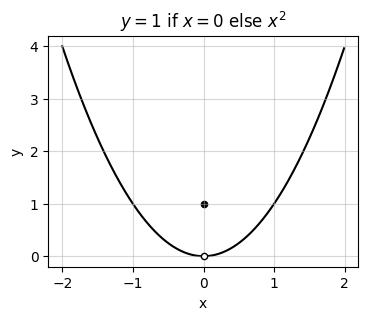

In [5]:
x = np.arange(-2, 2, 0.01)
f_neq_0 = lambda x: x ** 2

plt.plot(x, f_neq_0(x), color='black', zorder=0)
plt.scatter(0, 1, color='black', marker='o', s=20, zorder=1)
plt.scatter(0, 0, c='white', edgecolors='black', marker='o', s=20, zorder=2)
plt.grid(True, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = 1$ if $x = 0$ else $x^2$')
plt.show()

Suppose we make a first order perturbation to this function about $x_0=0$ by a small positive number $\varepsilon > 0$. Then

$$f(x_0+\varepsilon) = f(0 + \varepsilon) = f(\varepsilon) = \varepsilon^2.$$

If we now allow $\varepsilon \rightarrow 0$, then clearly $\varepsilon^2 \rightarrow 0$, so

$$L = \lim_{x \rightarrow 0} f(x) = 0 \neq f(0) = 1.$$

This is just a long drawn-out way of saying that the limit is what the function *would* be if it didn't have a hole in it at $x_0=0$. If the above function didn't have a hole in it, then $f(0)$ would be $L=0$.

In my experience, the only real place limits seem to come up in machine learning is the infinite limit case when $x \rightarrow \infty$,

$$\lim_{x \rightarrow \infty} f(x).$$

The easiest way to figure these limits out is to plug in a large value for $x$ and see what $f(x)$ is tending towards. For example, here's a demonstration that 

$$\lim_{x \rightarrow \infty} e^{-x} = 0.$$

You can see that $e^{-x}$ is pretty much $0$ by the time $x=20$, which suggests the limit is $0$ as $x \rightarrow \infty$. While this isn't a "proof", it should be pretty convincing.

In [6]:
for x in np.exp(range(6)):
    y = np.exp(-x)
    print(f'x = {x.round(2)} \t y = {y.round(8)}')

x = 1.0 	 y = 0.36787944
x = 2.72 	 y = 0.06598804
x = 7.39 	 y = 0.00061798
x = 20.09 	 y = 0.0
x = 54.6 	 y = 0.0
x = 148.41 	 y = 0.0


If you like, you can also use sympy to evaluate the infinite limit symbolically.

In [7]:
x = sp.symbols('x')
y = sp.exp(-x)
sp.limit(y, x, sp.oo)

0

Generally speaking, each additive term in a function will go like its most dominating component as $x \rightarrow \infty$. For example, take $y=x e^{-x} + 1$. The first term $xe^{-x}$ is dominated by $e^{-x}$ when $x$ is large, since it shrinks to $0$ *much* faster than $x$ increases. Since the other term just stays at $1$, we get

$$\lim_{x \rightarrow \infty} (x e^{-x} + 1) = 0 + 1 = 1.$$

When $x$ gets large, the following rule of thumb holds for different classes of functions, with functions to the left dominating functions to the right,

$$\text{factorials} >> \text{exponents} >> \text{polynomials} >> \text{logarithms} >> \text{constants}.$$

We'll work with this idea in more depth when we talk about algorithms.

## Differentiation

### Derivatives

Let's go back to our example before where we looked at first order perturbations to the function $y=x^2$. We showed if $x$ is infinitesimally changed to $x + \varepsilon$, then $y$ is changed to $y + \delta \approx 2x\varepsilon$.

When we talk about changing $x$ by a little bit and asking how $y$ changes we use a cleaner notation. Instead of writing $x + \varepsilon$, we'd write $x + dx$. Instead of writing $y + \delta$, we'd write $y + dy$. These values $dx$ and $dy$ are called **differentials**.

They're just infinitesimals like I defined them before, but this differential notation makes it clear what is a small change of what. Writing $dx$ means "a little bit of $x$". Writing $dy$ means "a little bit of $y$". This is where the term "differentiation" comes from.

In the language of differentials, we want to ask what happens to $y+dy$ in response to perturbations $x+dx$. In our running example, this is

$$y + dy = f(x+dx) = (x + dx)^2 = x^2 + 2xdx + dx^2 \approx x^2 + 2xdx,$$

with the approximate equality becoming exact when $dx$ is infinitesimal.

Let's solve for $dy$, how much $y$ changes in response to $x$ changing a little bit. Subtracting both sides by $y=x^2$ just gives $dy = 2xdx$. If we then divide both sides by $dx$ we get
$$\frac{dy}{dx} = 2x.$$

This ratio of differentials $\frac{dy}{dx}$ is called the **derivative** of the function $y=x^2$, usually just pronounced "dydx". The act of taking a derivative is called **differentiation**. Notice there's no infinitesimal ($dy$ or $dx$) on the right-hand side, hence the derivative is not itself an infinitesimal. It's finite.

Notice that the derivative is a *function* since it maps inputs $x$ to outputs $\frac{dy}{dx}=2x$. To indicate this functional relationship people sometimes write either 

$$\frac{dy}{dx}=\frac{d}{dx}f(x) \quad \text{ or } \quad \frac{dy}{dx}=f'(x)$$ 
to make this clear.

Let's use python to try to calculate what the derivative of $y=x^2$ is for a specific value of $x$, say $x=1$. We can do this by taking smaller and smaller values of $dx$ and looking at the ratio
$$\frac{dy}{dx}\bigg|_{x=1} = \frac{(x+dx)^2 - x^2}{dx}$$
for different choices of $dx$. 

**Notation:** Read the left-hand side of this expression as "the derivative evaluated at $x=1$". Another way to write the same thing is $f'(1)$ or $\frac{d}{dx}f(1)$.

I'll define a loop over some values of $dx$ and see what the predicted derivative is. Since the exact derivative function is $2x$, the exact answer at $x=1$ should be
$$\frac{dy}{dx}\bigg|_{x=1} = 2 \cdot 1 = 2.$$ 

I'll also print out the error, which is the predicted value $2$ minus the calculated value. Smaller error is better, obviously.

In [8]:
f = lambda x: x ** 2 # the function we want to differentiate
x0 = 1 # the value of x to calculate the derivative at
dydx_exact = 2 * x0 # the exact value of the derivative
for dx in [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-10, 1e-100, 1e-200]:
    dydx = (f(x0 + dx) - f(x0)) / dx
    error = dydx - dydx_exact
    print(f'dx = {dx:8.16f} \t dy/dx = {dydx:4f} \t error = {error:4f}')

dx = 1.0000000000000000 	 dy/dx = 3.000000 	 error = 1.000000
dx = 0.1000000000000000 	 dy/dx = 2.100000 	 error = 0.100000
dx = 0.0100000000000000 	 dy/dx = 2.010000 	 error = 0.010000
dx = 0.0010000000000000 	 dy/dx = 2.001000 	 error = 0.001000
dx = 0.0001000000000000 	 dy/dx = 2.000100 	 error = 0.000100
dx = 0.0000100000000000 	 dy/dx = 2.000010 	 error = 0.000010
dx = 0.0000000001000000 	 dy/dx = 2.000000 	 error = 0.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000


Starting with $dx=1$ is a bad choice with a huge error of $1.0$. We're way off. Shrinking to $dx=0.1$ puts us in the ball park with a value $\frac{dy}{dx}=2.1$. You can see that making $dx$ successively smaller and smaller makes the error successively smaller, in this case by a factor of 10 each time. 

The error is getting smaller all the way down to about $dx=10^{-10}$ before creeping up again as we make $dx$ even smaller than that. This is due to the numerical roundoff of floating point numbers. We're subtracting two numbers $f(x_0+dx) - f(x_0) = (1+dx)^2 - 1$ that are very close to each other when $dx$ is really small, which as you'll recall is one of the pitfalls to avoid when working with floating point numbers.

This method we just used to calculate the derivative is essentially exactly how derivatives are usually calculated on a computer. The process of calculating the derivative this way, directly from its definition essentially, is called **numerical differentiation**. We choose a small value of $dx$ and just apply the formula above, with some minor tweaks to get better accuracy in fewer steps. It's common in practice to choose "less small" values for $dx$ when calculating derivatives numerically like this, e.g. `1e-5`.

We can talk about any reasonably well-behaved function $f(x)$ having a derivative. If $y=f(x)$ and we make a first order perturbation $x+dx$, then $y$ gets perturbed by $y+dy=f(x+dx)$. The amount $y=f(x)$ changes *per amount* $dx$ is then the **derivative**

$$\frac{dy}{dx} = \frac{f(x+dx)-f(x)}{dx}.$$

This definition is only exact when $dx$ is infinitesimal. For finite values of $dx$ (like what we'd code up on a computer) this equality is only approximately true.

What do I mean when I say the function $f(x)$ needs to be reasonably well behaved? For one thing, the function needs to be **continuous**. Informally, you can think of a univariate function as being continuous if you can draw its curve on a piece of paper without lifting your pen. There are no jumps or holes anywhere in the functions' curve. More formally, a function is continuous at $x_0$ if $f(x) \rightarrow f(x_0)$ as $x \rightarrow x_0$.

Continuity is just *one* condition necessary for $f(x)$ to be differentiable. It also can't be too jagged in some sense. Derivatives don't make sense at points where there are kinks in the function curve. At points where there are kinks we have to use a slightly different kind of derivative called a [subderivative](https://en.wikipedia.org/wiki/Subderivative).

Since derivatives are functions we can take the derivative of the derivative too, $\frac{d}{dx} \frac{dy}{dx}$, which turns out to be

$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx} = \frac{d}{dx} \frac{f(x+dx)-f(x)}{dx} = \frac{f(x+2dx) - 2f(x+dx) + f(x)}{dx^2}.$$

This is called a **second derivative**, and sometimes also written $f'(x)$ or $\frac{d^2}{dx^2} f(x)$.

As a quick example, the second derivative of our running function $y=x^2$ is the first derivative of $2x$, which is

$$\frac{d^2 y}{dx^2} = \frac{2(x + dx) - 2x}{dx} = 2.$$

Higher-order derivatives can be defined as well by continuing to take derivatives of the second derivative, like third derivatives of fourth derivatives. These show up less prominently though, and as such aren't discussed all that much.

### Visualizing Derivatives

The first derivative $\frac{dy}{dx}$ has an interesting and useful geometric interpretation as the **slope** of the curve $y=f(x)$ at the point $x$. To see this, imagine a right triangle with length $dx$ and height $dy$. The slope, or "steepness", of its hypotenuse is just the ratio height over width, i.e. $\frac{dy}{dx}$.

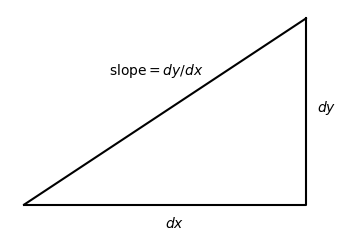

In [9]:
plot_right_triangle()

We can use this idea to talk about the slope of a function at a point. If $y=f(x)$ is a function, then the derivative $\frac{dy}{dx}$ at some point $x=x_0$ is the slope of that function at the point $(x_0,y_0)$. It's the slope of the line that hugs the point $(x_0,y_0)$ *tangent* to the curve. This "hugging line" is called the **tangent line**. We can pretty easily solve for what this line has to be. It must run through $(x_0,y_0)$ and have slope $m=\frac{d}{dx}f(x_0)$, so writing $y=mx+b$ and solving for the intercept $b$ would give the first order perturbation

$$y = y_0 + \frac{d}{dx}f(x_0)(x - x_0).$$

Here's an example. I'll plot the function $y=x^2$ and its *tangent* at a point $x_0=2$ on the x-axis. The corresponding $y$ at $x=2$ is just $y_0=x_0^2=4$. As we derived above, its derivative (and hence slope) at $x_0=2$ is

$$\frac{d}{dx}f(2)=2(2)=4,$$

so the equation for the tangent line of $y=x^2$ at $x_0=2$ is

$$y = 4 + 4(x - 2) = 4x -4.$$

The code below implements this calculation. I'll define the function `f` that gives `y = f(x)` along with the derivative `dydx = dfdx(x)`, and then use these two define a function `f_tangent` to calculate the tangent line, which also depends on a specified point `x0`.

Feel free to adjust the value of `x0` observe how the slope changes with the value you pick. In all cases, the line should hug the curve of the function and stay tangent to it.

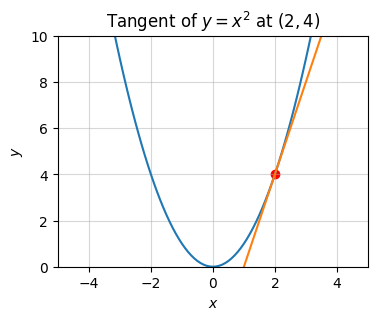

In [10]:
f = lambda x: x ** 2
dfdx = lambda x: 2 * x

x0 = 2
y0 = f(x0)
x = np.arange(-3 * x0, 3 * x0, 0.1)

f_tangent = lambda x: y0 + dfdx(x0) * (x - x0)
plot_tangent_line(x, x0, f, f_tangent, xlim=(-5, 5), ylim=(0, 10), title=f'Tangent of $y=x^2$ at ${(x0,y0)}$')

Generally speaking, if the derivative $\frac{dy}{dx}$ at a point is *positive* the tangent line will slant towards the *right*. If the derivative at that point is *negative* the tangent line will slant towards the *left*. If it's zero, the tangent line there will be horizontal.

The second derivative $\frac{d^2 y}{dx^2}$ has a geometric interpretation as well. It captures information about the *curvature* of the function. To see why this is true we need to look at *second order perturbations*, which add in a new term of order $(x-x_0)^2$,

$$y = y_0 + \frac{d}{dx}f(x_0) (x-x_0) + \color{red}{\frac{1}{2}\frac{d^2}{dx^2}f(x_0) (x-x_0)^2}.$$

A second order perturbation defines a *tangent parabola* given by a quadratic function $y=ax^2+bx+c$, where $a,b,c$ are coefficients determined by the values of the inputs $f(x_0), \frac{d}{dx}f(x_0), \frac{d^2}{dx^2}f(x_0)$. Most importantly, the leading coefficient $a$ is just the second derivative at $x=x_0$, i.e. $a = \frac{d^2}{dx^2}f(x_0)$.

Since $a$ determines the shape of the tangent parabola, it also determines the curvature of the function at $x=x_0$. If $a$ is large at $x=x_0$, the function will be sharply curved around that point. If $a$ is small, the function will be very flat around $x=x_0$. The sign of $a$ will indicate whether the function is curved upward or downward. If $a>0$ the function will be curved upward. If $a < 0$ it'll curve downward. 

In our example $y=x^2$, since $a=\frac{d^2 y}{dx^2} = 2 > 0$, the function curves upward for *every* point $x$. A function with this property is called a **convex function**. The tangent parabola to $y=x^2$ is just the function itself, since it's already a quadratic function.

### Differentiation Rules

As we've seen, derivatives are functions, $\frac{dy}{dx} = \frac{d}{dx}f(x)$. For this reason, several rules exist relating derivatives to their original functions. 

Note that for most people doing machine learning it's not really that important to know all of these rules. However, if you're more into research or just mathematically inclined it may interest you to be more familiar with them.

Here are the derivatives of some common functions that come up:

<table width="20%">
  <tr>
    <th style="text-align: center">Common Derivatives</th>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}1 = \frac{d}{dx}0 = 0$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}x = 1$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}x^2 = 2x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\sqrt{x} = \frac{1}{2\sqrt{x}}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\frac{1}{x} = -\frac{1}{x^2}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}e^x = e^x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\log{x} = \frac{1}{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\sin{x} = \cos{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\cos{x} = -\sin{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\sigma(x) = \sigma(x)\big(1-\sigma(x)\big)$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\tanh(x) = \big(1 - \tanh^2(x)\big)$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\text{ReLU}(x) = u(x) = [x \geq 0]$</td>
  </tr>
</table>

Here are some more general derivative rules you can use to differentiate more arbitrary functions:
<table width="100%">
  <tr>
    <th style="width: 20ch; text-align: left">Name</th>
    <th style="width: 50ch; text-align: left">Rule</th>
    <th style="width: 50ch; text-align: left">Example</th>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;"></td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(c) = 0$ for any constant $c$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(10) = 0$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Power Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}x^n = nx^{n-1}$ for any $n \neq 0$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}x^3 = 3x^2$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Addition Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(u + v) = \frac{du}{dx} + \frac{dv}{dx}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(x^2 + \log x) = \frac{d}{dx}x^2 + \frac{d}{dx}\log x = 2x + \frac{1}{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(cy) = c \frac{dy}{dx}$ for any constant $c$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}2 \sin x = 2 \frac{d}{dx}\sin x = 2 \cos x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Product Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(uv)=u\frac{dv}{dx} + v\frac{du}{dx}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(x e^x) = x \frac{d}{dx}e^x + e^x \frac{d}{dx} x = xe^x + e^x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Quotient Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}\big(\frac{u}{v}\big) = \frac{v\frac{du}{dx}-u\frac{dv}{dx}}{v^2}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} \frac{\cos x}{x^2} = \frac{x^2\frac{d}{dx}\cos x-\cos x\frac{d}{dx}x^2}{(x^2)^2} = \frac{-x^2 \sin x - 2x \cos x}{x^4}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Chain Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}f(g(x)) = \frac{d}{dy}f(y)\frac{d}{dx}g(x) = \frac{dz}{dy}\frac{dy}{dx}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} e^{\sin x} = \frac{d}{dy} e^y \frac{d}{dx}\sin x = e^{\sin x} \cos x$</td>
  </tr>
</table>

**Aside:** These rules are simple to derive using infinitesimals. For example, here's a derivation of the all important chain rule. Suppose we have a composite function of two differentiable functions $z=f(y)$ and $y=g(x)$. That is, $z=f(g(x))$. Perturb $x$ by some infinitesimal $dx$. Then $y + dy = g(x + dx)$, so

$$dy = g(x+dx)-g(x) = \frac{g(x+dx)-g(x)}{dx} dx = \frac{dy}{dx} dx.$$

Since $dy$ is also infinitesimal, perturbing $y$ by $dy$ will do the same thing to $z=f(y)$, since $z + dz = f(y + dy)$, and

$$dz = f(y+dy)-f(y) = \frac{f(y+dy)-f(y)}{dy} dy = \frac{dz}{dy} dy,$$

Putting these two results together, the infinitesimal change $dz$ in $z=f(g(x))$ resulting from the original infinitesimal change $dx$ is given by

$$dz = \frac{dz}{dy} dy = \frac{dz}{dy} \frac{dy}{dx} dx.$$

Dividing both sides by $dx$ gives the derivative of the composite function $z=f(g(x))$,

$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}. \square$$

### Application: The Sigmoid Function

To illustrate how to calculate derivatives I'll use a relevant example to machine learning, the sigmoid function. Recall the sigmoid function $y=\sigma(x)$ is defined by

$$y = \frac{1}{1 + e^{-x}}.$$

Its shape looks like an S (hence the name), going from $y=0$ at $x=-\infty$ to $y=1$ at $x=\infty$.

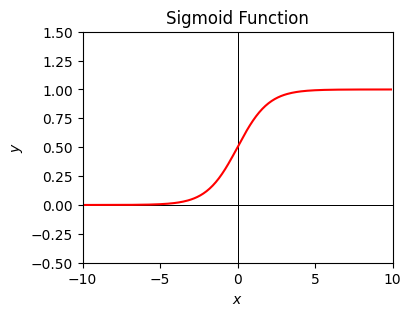

In [11]:
x = np.arange(-10, 10, 0.1)
f = lambda x:  1 / (1 + np.exp(-x))
plot_function(x, f, xlim=(-10, 10), ylim=(-0.5, 1.5), show_grid=False, title='Sigmoid Function')

Let's calculate the derivative of this function. First, though, let's use some intuition and try to figure out what the derivative should be doing based on the shape of the sigmoid curve. When $x$ is really negative, say $x < -5$, the slope looks basically flat, hence the derivative should be zero there. Similarly, when $x$ is really positive, say $x > 5$, the derivative should be zero there too. Around $x=0$, say $-1 < x < 1$, the sigmoid looks kind of linear with positive slope. There we should expect the derivative to be positive, and roughly constant over that interval.

To verify this, let's calculate the derivative of the sigmoid explicitly. There are a few ways to do this, but I'll use the chain rule here. We have

$$
\begin{align}
\frac{d}{dx} \sigma(x) &= \frac{d}{dx} \frac{1}{1 + e^{-x}}\\
&= \frac{d}{dx} (1 + e^{-x})^{-1} \\
&= (-1) (1 + e^{-x})^{-2} \frac{d}{dx} e^{-x} \\
&= -(1 + e^{-x})^{-2} (-1) e^{-x} \\
&= \frac{e^{-x}}{(1 + e^{-x})^{2}} \\
&= \frac{1}{1 + e^{-x}} \frac{(1 + e^{-x}) - 1}{1 + e^{-x}} \\
&= \frac{1}{1 + e^{-x}} \bigg(1-\frac{1}{1 + e^{-x}}\bigg) \\
&= \sigma(x) \big(1 - \sigma(x)\big).
\end{align}
$$

Let's look at this answer and verify it matches our intuition as to what the derivative of the sigmoid should be. 
- When $x < -5$, $\sigma(x) \approx 0$, hence $\frac{d}{dx} \sigma(x) \approx 0$. 
- When $x > 5$, $\sigma(x) \approx 1$, so $1 - \sigma(x) \approx 0$, and again $\frac{d}{dx} \sigma(x) \approx 0$.
- When $-1 < x < 1$, $\sigma(x) \approx \sigma(0) + \frac{d}{dx}\sigma(0) \cdot (x-0) = \frac{1}{2} + \frac{1}{2}\big(1 - \frac{1}{2}\big) \cdot x = \frac{1}{2} + \frac{1}{4}x$, which is a tangent line with a positive slope of $\frac{1}{4}$.

To further verify the things look like a line around $x=0$, we could look at the second derivative and verify it's approximately zero in the region $-1 < x < 1$. I'll leave that exercise to you.

The sigmoid function shows up in machine learning when doing binary classification. If a problem can be classified into two classes, $0$ or $1$, the sigmoid can be used to model the probability of the input being in class $1$. The closer the sigmoid is to $1$, or equivalently the larger $x$ is, the more likely the input is a $1$. More on this in a future lesson.

To calculate the derivative of a function in sympy, use `y.diff(x)`, which means "differentiate $y$ with respect to $x$".

Here is a calculation of the derivative of the sigmoid function. I'll also calculate the second derivative to show you how easy it is to do relative to the torture of trying to do it by hand.

In [12]:
x = sp.Symbol('x')

In [13]:
y = 1 / (1 + sp.exp(-x))
y.diff(x)

exp(-x)/(1 + exp(-x))**2

In [14]:
y.diff(x).diff(x)

-exp(-x)/(1 + exp(-x))**2 + 2*exp(-2*x)/(1 + exp(-x))**3

## Integration

Since integration is literally half of the subject of calculus, I owe it to at least briefly mention the topic. This section is only really applicable to the other topics in this book if you want to better understand probability distributions, something I'll cover in detail in the next lesson. If you don't mind thinking of probability distributions as histograms with infinitely many samples, you're free to skip this section and move ahead.

### Summing Infinitesimals

The other half of calculus is essentially about summing up small things to get big things. By small things of course I mean infinitesimals. Suppose we have a bunch of infinitesimals $\varepsilon_0, \varepsilon_1, \cdots, \varepsilon_{n-1}$. We can add them together to get a new infinitesimal $\varepsilon_0 + \varepsilon_1 + \cdots + \varepsilon_{n-1}$.

Suppose we want to add up the same infinitesimal $\varepsilon$ some number $N$ times,
$$\underbrace{\varepsilon + \varepsilon + \cdots + \varepsilon}_{\text{N times}} = N\varepsilon.$$

If $N$ is any reasonably sized finite number, say a number like $N=1000$, then the product $N\varepsilon$ will again be infinitesimal, since $(N\varepsilon)^2 \approx 0$. But if we make $N$ *infinitely large*, then $N\varepsilon$ will be a finite number.

Here's how this might look when adopting our informal convention that infinitesimals equal $10^{-300}$ and infinitely large numbers equal $10^{300}$. For $N=1000$ the square $(N\varepsilon)^2 \approx 0$. But it's not when we take $N=10^{300}$. It's finite, with $(N\varepsilon)^2=1$.

In [15]:
epsilon = 1e-300

In [16]:
N = 1000
(N * epsilon) ** 2

0.0

In [17]:
N = 1e300
(N * epsilon) ** 2

1.0

Thus, if we add up only a *finite* number of infinitesimals we'll again get an *infinitesimal*. But, if we add up an *infinitely large* number of infinitesimals we'll get something *finite*. This is the idea behind integration.

### Area Under The Curve

Let's do an example. Suppose we're interested in calculating the area under the curve $y=\sqrt{x}$ between two points, say $x=0$ and $x=10$. How would we go about this? Perhaps the easiest idea is to approximate the function by a shape that's easier to calculate the area of, something you've seen in geometry, like a square or a triangle. A better idea is to take a bunch of simple shapes, calculate their areas, and add them together. 

Let's try to do this using rectangles. Let's approximate the function $f(x)=\sqrt{x}$ with $N=10$ equally-spaced rectangles of varying heights $f(x)$, where $x$ is taken at each integer value $x=1,2,3,\cdots,10$. The width of each rectangle is $dx=\frac{b-a}{N}=1$. We know for rectangles their area is width times height, which in this case is $dx \cdot f(x) = f(x)dx$. Then the total area under the curve of $y=\sqrt{x}$ would roughly be the sum of all these rectangle areas,

$$
\begin{align}
A &\approx f(1)dx + f(2)dx + f(3)dx + \cdots + f(10)dx \\
&= \big(f(1) + f(2) + f(3) + \cdots + f(10)\big)\cdot dx \\
&= \big(\sqrt{1} + \sqrt{2} + \sqrt{3} + \cdots + \sqrt{10}\big)\cdot 1 \\
&\approx 22.468
\end{align}
$$

It's helpful to visualize what's going on. Below I'll plot this area approximation scheme by using the helper function `plot_area_under_curve`, which will show the plot of the curve and its approximating rectangles. It also prints out the approximating area calculated above.

Approximate Area: 22.468278186204103


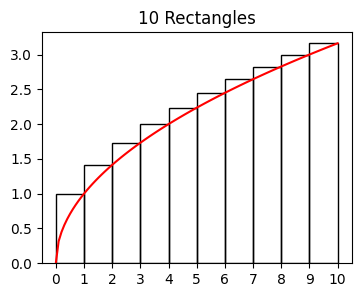

In [18]:
f = lambda x: np.sqrt(x)
x = np.linspace(0, 10, 100)
plot_area_under_curve(x, f, dx=1.0)

If you stare at the plot you can see our area estimate is okay but not great. The rectangles are *overestimating* the area under the curve since they all have segments of area lying above the curve.

The problem was that the rectangles we used were too coarse. It's better to use narrower rectangles, and more of them. What we need to do is make $dx$ smaller by making $N$ bigger. Let's try using $N=50$ rectangles of width $dx=0.2$ instead and see how much the result improves.

Approximate Area: 21.380011968222313


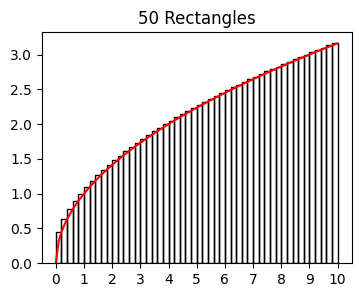

In [19]:
plot_area_under_curve(x, f, dx=0.2)

It looks better. We're at $21.380$ now. If you zoom in you'll see we're still overestimating the true area, but not by near as much as before. As we make $dx$ smaller and smaller, and $N$ bigger and bigger, this estimate will get better and better. The exact area under this curve turns out to be 

$$A = \frac{20}{3}\sqrt{10} \approx 21.082.$$

Let's try to calculate these areas using smaller and smaller rectangles and see how close we can get to the exact answer. To do this, I'll use a loop to calculate the area for successively smaller values of $dx$.

In [20]:
f = lambda x: np.sqrt(x)

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    N = int(10 / dx)
    xs = np.cumsum(dx * np.ones(N))
    area = np.sum([f(x)*dx for x in xs])
    print(f'N = {N:6d} \t dx = {dx:8.4f} \t A = {area:4f}')

N =     10 	 dx =   1.0000 	 A = 22.468278
N =    100 	 dx =   0.1000 	 A = 21.233523
N =   1000 	 dx =   0.0100 	 A = 21.097456
N =  10000 	 dx =   0.0010 	 A = 21.083426
N = 100000 	 dx =   0.0001 	 A = 21.082009


It looks like if we want to get the correct answer $21.082$ to 3 decimal places we'd need to use $N=100000$ rectangles of width $dx=10^{-4}$. In practice that's an awful lot of terms to sum up. There are better ways to actually calculate these things numerically than just using the above definition (e.g. [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule)), but I won't go into those.

Let's generalize this. Suppose we want to calculate the area under the curve of some function $y=f(x)$ between two points $x=a$ and $x=b$. We can do this by taking $N$ rectangles each of width $dx=\frac{b-a}{N}$ and height $f(x)dx$ and summing up their areas. If $x_0,x_1,\cdots,x_{N-1}$ are the points we're evaluating the heights at, then
$$A \approx f(x_0)dx + f(x_1)dx + f(x_2)dx + \cdots + f(x_{N-1})dx = \sum_{n=0}^{N-1} f(x_n) dx.$$

To get the exact area, let's allow $N$ to get infinitely large, which also means $dx$ will become infinitesimal. When we do this, it's conventional to use a different symbol for the sum, the long-S symbol $\int$. Instead of writing

$$A = \sum_{n=0}^{N-1} f(x_n) dx,$$

we'd write
$$A = \int_a^{b} f(x) dx.$$

Read this as "the integral from 0 to 10 of $f(x)dx$". It's called the **definite integral** of the function. In our example, this would be

$$A = \int_0^{10} \sqrt{x} dx.$$

Of course, this fancy notation doesn't actually tell us anything new. We're still just summing up the areas of a bunch of rectangles.

### Integration Rules

It's not at all clear from this definition how we'd get the *exact* answer $A=\frac{20}{3}\sqrt{10}$ shown above. We can get to it approximately by summing rectangle areas, but if we want to get the exact value we'll need a few integral rules.

Before doing so I need to talk about the **indefinite integral**, sometimes called the antiderivative. If $f(x)$ is some function, then its indefinite integral is some other function $F(x)$ whose derivative is $f(x)$,
$$f(x) = \frac{d}{dx} F(x).$$

Typically the indefinite integral is written as an integral, but without limits of integration shown,

$$F(x) = \int f(x) dx.$$

To evaluate a typical *definite* integral like $\int_a^b f(x) dx$ the rule is
$$\int_a^b f(x) dx = F(x) \bigg|_{x=a}^{x=b} = F(b) - F(a).$$

That is, we first calculate the indefinite integral $F(x)$, then evaluate it at the points $a$ and $b$, then subtract their difference to get the definite integral, which itself is just the area under the curve of $f(x)$.

With this out of the way, here are some common indefinite integrals:
<table width="20%">
  <tr>
    <th style="text-align: center">Common Integrals</th>
  </tr>
  <tr>
    <td style="text-align: left">$\int 0 dx = 0$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int 1 dx = x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int x dx = \frac{1}{2}x^2$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int x^2 dx = \frac{1}{3}x^3$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \sqrt{x} dx = \frac{2}{3} x^{3/2}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \frac{1}{x} dx = \log{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int e^x dx = e^x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \log{x} dx = x \log{x} - x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \sin{x} dx = -\cos{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \cos{x} dx = \sin{x}$</td>
  </tr>
</table>

Here are some more general integral rules for indefinite integrals:
<table width="100%">
  <tr>
    <th style="width: 20ch; text-align: left">Name</th>
    <th style="width: 50ch; text-align: left">Rule</th>
    <th style="width: 50ch; text-align: left">Example</th>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Power Rule</td>
    <td style="width: 50ch; text-align: left;">$\int x^n dx = \frac{1}{n+1}x^{n+1}$ for any $n \neq -1$</td>
    <td style="width: 50ch; text-align: left;">$\int x^{-2} dx = \frac{1}{-2+1}x^{-2+1} = -\frac{1}{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Addition Rule</td>
    <td style="width: 50ch; text-align: left;">$\int (u + v) dx = \int u dx + \int v dx$</td>
    <td style="width: 50ch; text-align: left;">$\int (1 + e^x) dx = \int 1 dx + \int e^x dx = x + e^x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Rule</td>
    <td style="width: 50ch; text-align: left;">$\int cf(x) dx = c \int f(x) dx$</td>
    <td style="width: 50ch; text-align: left;">$\int 5 \cos{x} dx = 5 \int \cos{x} dx = 5 \sin{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Integration By Parts</td>
    <td style="width: 50ch; text-align: left;">$\int u dv = uv - \int v du$</td>
    <td style="width: 50ch; text-align: left;">$\int x e^x dx = \int x d(e^x) = x e^x - \int e^x dx = x e^x - e^x $</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Change of Variables</td>
    <td style="width: 50ch; text-align: left;">$\int f(u) du = \int f(g(x)) \frac{du}{dx} dx$</td>
    <td style="width: 50ch; text-align: left;">$\int x e^{x^2} dx = \int e^{x^2} d\big(\frac{1}{2}x^2\big) = \frac{1}{2} \int e^u du = \frac{1}{2} e^u = \frac{1}{2} e^{x^2}$</td>
  </tr>
</table>

Note $d(f(x))$ is just the differential form of the derivative $\frac{d}{dx}f(x)$, so $d(f(x)) = \frac{d}{dx}f(x) dx$.

It's worth mentioning that integral rules are often much harder to apply than derivative rules. In fact, it's not even possible to symbolically integrate every function. The Gaussian function $y=e^{-x^2}$ is a well-known example of a function that can't be integrated symbolically. Of course, we can *always* calculate the *definite* integral numerically, even if we can't symbolically.

Just as with derivatives, sympy can evaluate integrals for you, both definite and indefinite integrals. Below I'll use `y.integrate((x, 0, 10))` to calculate the area under the curve problem I did before,

$$A = \int_0^{10} \sqrt{x} dx = \frac{20}{3} \sqrt{10}.$$

In [21]:
x = sp.Symbol('x')
y = sp.sqrt(x)
y.integrate((x, 0, 10))

20*sqrt(10)/3

Sympy can of course handle indefinite integrals too by leaving off the limits of integration.

In [22]:
y.integrate(x)

2*x**(3/2)/3